In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:

print(train_data.head())
print(train_data.info())
print(train_data.describe())

In [ ]:
print("Missing Values in Train Data:")
print(train_data.isnull().sum())

In [ ]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
#This is for replacing the null values with mean values to make the data more reliable

In [ ]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)

In [ ]:
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

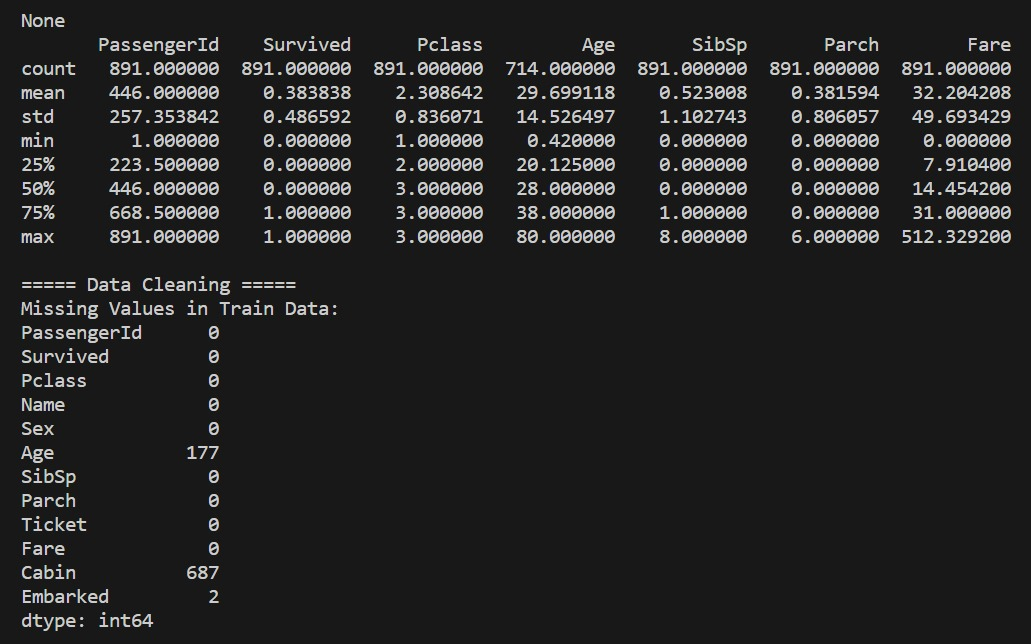

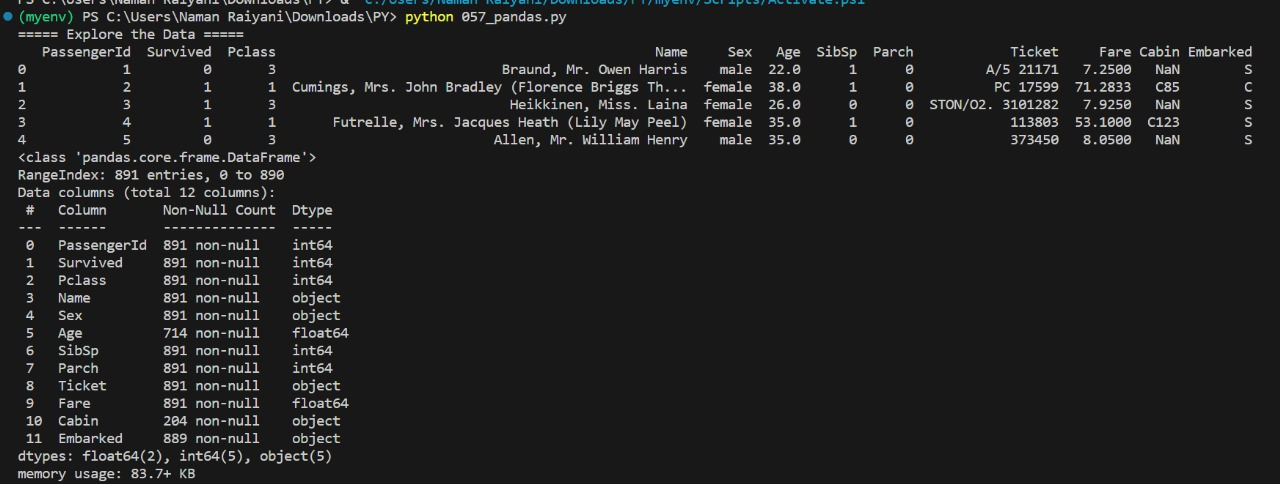

### EDA STARTS HERE

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.show()

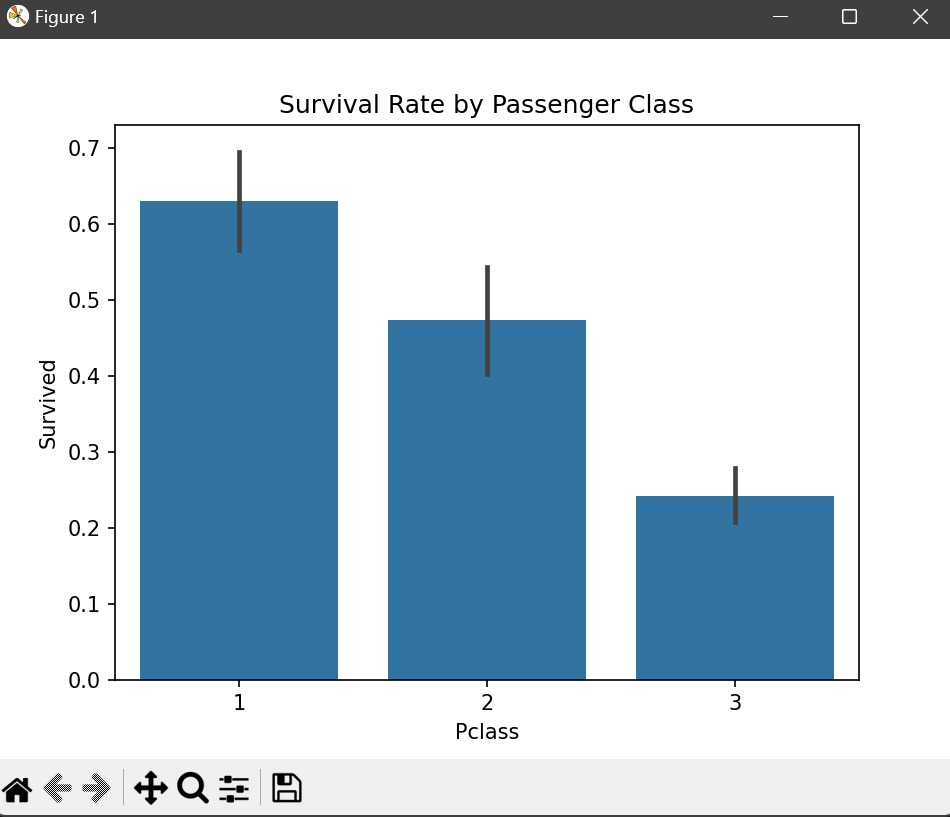

In [ ]:
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Sex')
plt.show()

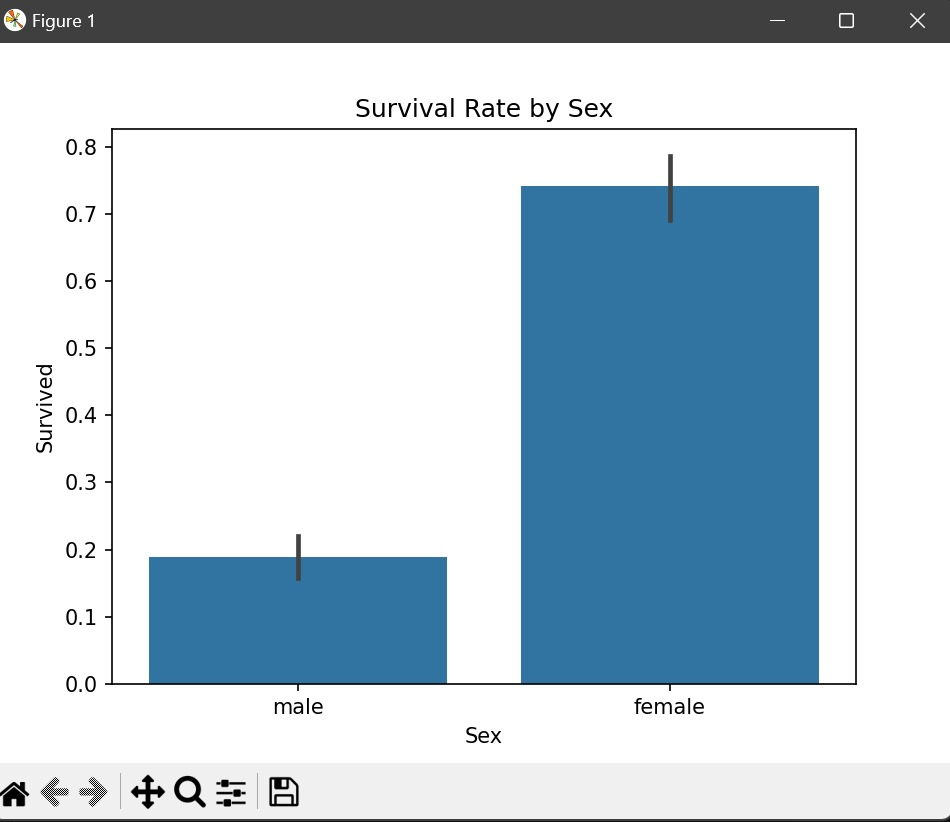

In [ ]:
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '51+'])
sns.barplot(x='AgeGroup', y='Survived', data=train_data)
plt.title('Survival Rate by Age Group')
plt.show()


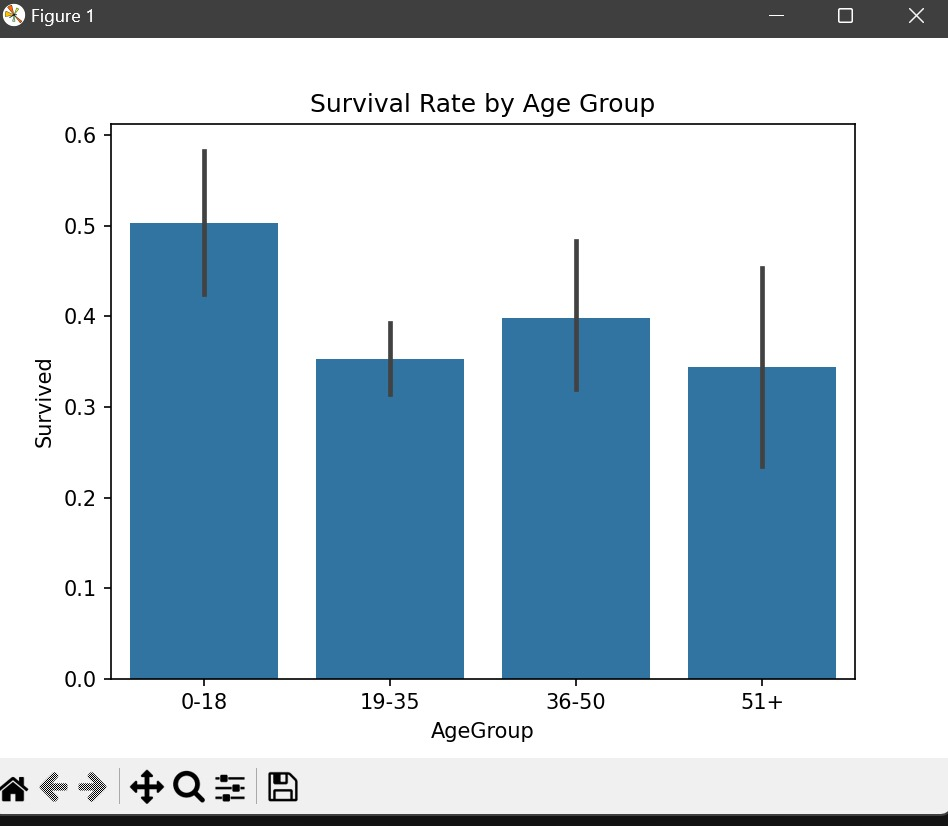

In [ ]:
sns.barplot(x='FamilySize', y='Survived', data=train_data)
plt.title('Survival Rate by Family Size')
plt.show()

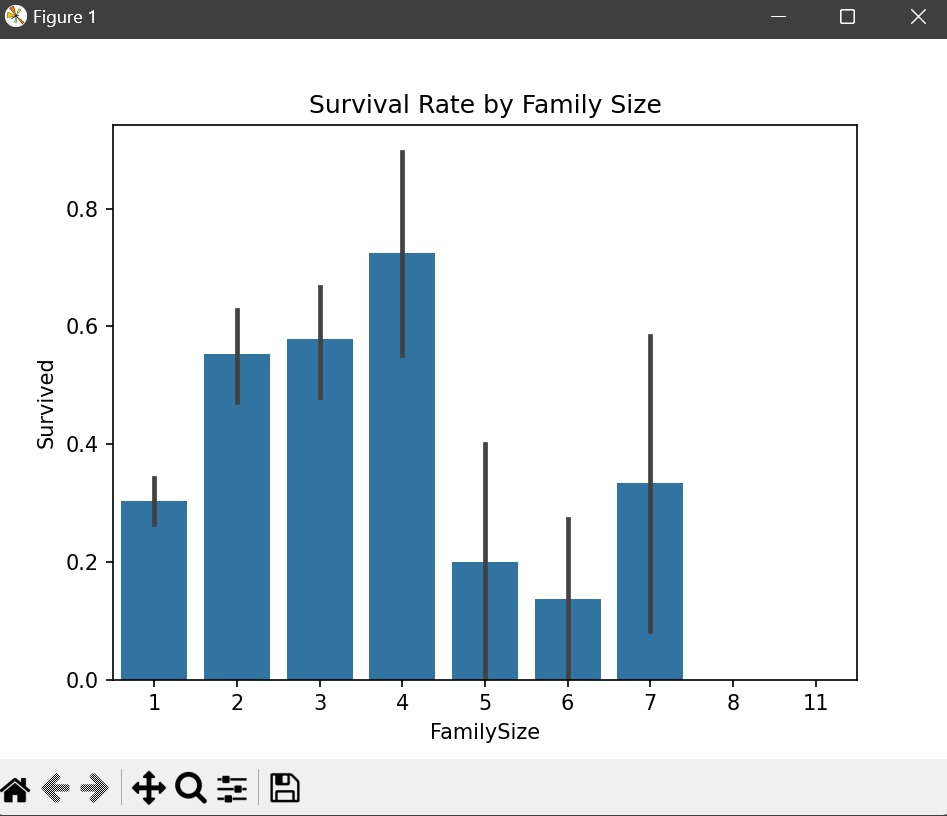

In [ ]:
numeric_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = train_data[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

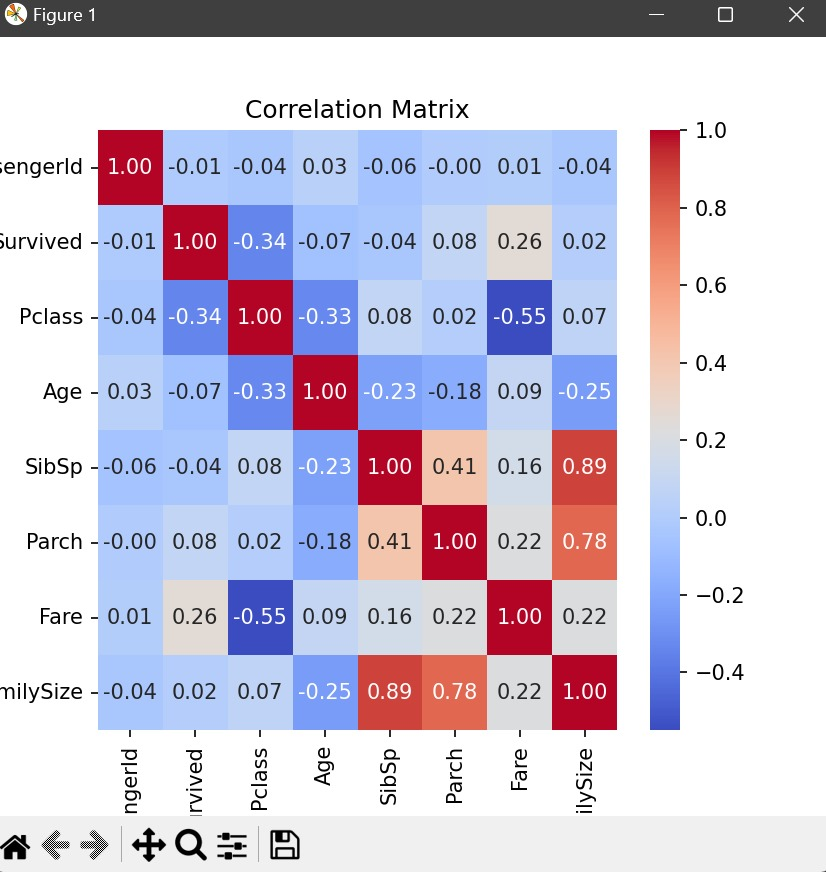

### MODEL TRAINING

In [ ]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'FamilySize']
X = pd.get_dummies(train_data[features])
y = train_data['Survived']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=50)
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_val)

In [ ]:
accuracy = accuracy_score(y_val, predictions)
print(f"Model Accuracy on Validation Set: {accuracy:.2%}")

In [ ]:
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
test_features = pd.get_dummies(test_data[features])

In [ ]:
test_predictions = model.predict(test_features)

In [ ]:
test_features = pd.get_dummies(test_data[features])

# Make predictions on the test data
test_predictions = model.predict(test_features)

# Step 8: Submit Results (if applicable)
print("\n===== Submit Results (if applicable) =====")
# Example: Create a submission file for a Kaggle competition
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'],'Name': test_data['Name'], 'Survived': test_predictions})
submission.to_csv('titanic_submission_extended.csv', index=False)
print("Submission file created: titanic_submission_extended.csv")


In [ ]:
print(submission)

In [ ]:
!pip install flask

In [ ]:
from flask import Flask, render_template, request, jsonify
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
def predict_survival(data):
    # Apply the same preprocessing to the input data
    data['Age'].fillna(data['Age'].mean(), inplace=True)
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    input_features = pd.get_dummies(data[features])

    # Make predictions using the trained model
    predictions = model.predict(input_features)

    # Return the predictions as a list
    return predictions.tolist()

# Create a Flask app
app = Flask(__name__)
@app.route('/')
def index():
    return render_template('index.html', accuracy=accuracy)


# Define the route for prediction
@app.route('/predict', methods=['POST'])
def predict():
    # Get input data from the request
    input_data = request.json['data']

    # Make predictions using the predict_survival function
    predictions = predict_survival(input_data)

    # Return predictions as JSON
    return jsonify(predictions)

# Prepare features and target variable for model training
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'FamilySize']
X = pd.get_dummies(train_data[features])
y = train_data['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Run the Flask app
if __name__ == '__main__':
    app.run(port=5009,debug=True)

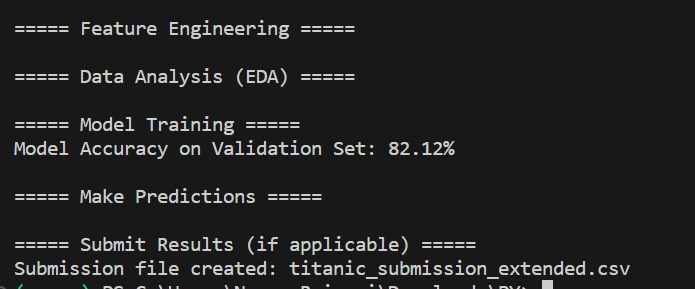

###1) CONTENTS OF DATA:

1. **PassengerId:**
   - *Description:* A unique identifier for each passenger.
   - *Use:* Typically not used for predictions but can be useful for data integrity.

2. **Survived:**
   - *Description:* Binary variable indicating whether the passenger survived or not (1 for survived, 0 for not survived).
   - *Use:* Target variable for prediction.

3. **Pclass:**
   - *Description:* Ticket class (1st, 2nd, or 3rd).
   - *Use:* Social status and potentially related to survival rates.

4. **Name:**
   - *Description:* Passenger's name, including title (Mr., Mrs., etc.).
   - *Use:* Extracting titles might provide additional information about social status.

5. **Sex:**
   - *Description:* Gender of the passenger.
   - *Use:* Significant in predicting survival rates, as women and children were given priority.

6. **Age:**
   - *Description:* Age of the passenger.
   - *Use:* Important for predicting survival, as children were likely given priority.

7. **SibSp:**
   - *Description:* Number of siblings/spouses aboard the Titanic.
   - *Use:* Could be used to create a feature indicating family size.

8. **Parch:**
   - *Description:* Number of parents/children aboard the Titanic.
   - *Use:* Combined with SibSp, can be used to create a family size feature.

9. **Ticket:**
   - *Description:* Ticket number.
   - *Use:* May not have direct predictive power unless patterns are discovered.

10. **Fare:**
    - *Description:* Passenger fare.
    - *Use:* Can be related to social status and potentially impact survival rates.

11. **Cabin:**
    - *Description:* Cabin number where the passenger stayed.
    - *Use:* May not be directly useful due to many missing values, but cabin location could impact survival.

12. **Embarked:**
    - *Description:* Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
    - *Use:* May have some correlation with social status and survival rates.

These features provide the basis for predicting survival rates based on various factors such as gender, age, social class, and family relationships. It's important to explore and preprocess the data, handle missing values, and derive additional features before applying machine learning algorithms for prediction.

###DATA COLLECTED FROM kaggle.com


2) WHAT IS DONE IN THE PROJECT:

1. **Data Preparation:**
   - The project starts with loading and exploring the dataset (`train.csv` and `test.csv`), gaining insights into the structure of the data and identifying potential features for predicting survival rates.

2. **Feature Engineering:**
   - Feature engineering is a crucial step where additional features are created or existing ones are modified to enhance the predictive power of the model. Examples include extracting titles from names, creating a family size feature, and converting categorical variables into a suitable format for machine learning models.

3. **Model Selection and Training:**
   - The choice of a machine learning model is important. In this case, a RandomForestClassifier is used, which is capable of handling both numerical and categorical features. The training dataset is split into features (X) and the target variable (y), and the model is trained on the training set.

4. **Model Evaluation:**
   - The model's performance is evaluated on a validation set using metrics like accuracy. This step helps assess how well the model generalizes to new, unseen data. Fine-tuning and model selection may be iterated based on the evaluation results.

5. **Prediction on Test Data:**
   - After training and evaluating the model, it is used to make predictions on the test dataset. The same preprocessing steps applied to the training set are replicated for the test set.

By following these steps, the project aims to build a predictive model for Titanic survival rates and provides a structured approach for data exploration, feature engineering, model selection, and evaluation.

##3) Observations:

The dataset contains various columns such as 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', etc., providing information about passengers on the Titanic.
There are missing values in the 'Age' column (177 missing) and 'Embarked' column (2 missing), which were addressed by filling missing ages with the mean and can be further investigated.
Conclusions:

The model achieved an accuracy of 82.12% on the validation set, indicating reasonable predictive performance.
The feature engineering, including the creation of the 'AgeGroup' and 'FamilySize' features, contributed to a more detailed analysis of survival rates based on age and family size.
